<a id="top_page"></a>
# MAST Archive Data

This is a notebook that queries MAST data using the Table Access Protocol using Astronomical Data Query Language(ADQL) and downloads it into specific folders. 

In [1]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.utils.data import download_file
import astroquery
import time
from astroquery.mast import Catalogs
import pyvo as vo

In [2]:
from matplotlib import pyplot as plt
import time
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
import warnings as wr
wr.filterwarnings("ignore")

## Some additional functions

In [3]:
def getTableColumns(tableName):
    """
    This is a helper function that fetches the columns of the table present in the tap service
    and returns them in the form of an astropy table.
    """
    col_list = []
    for c in tap.tables[tableName].columns: 
        datum = {'name': c.name, 'description': c.description, 'unit': c.unit}
        col_list.append(datum)
    return(Table(col_list))

## Table Acess Protocol 

### Connecting to the STScI Table Access Protocol Endpoint

In [5]:
TAP_URL = "http://vao.stsci.edu/caomtap/tapservice.aspx"
#TAP_URL = "https://exoplanetarchive.ipac.caltech.edu/TAP"

In [6]:
tap = vo.dal.TAPService(TAP_URL)
tap.describe()

Capability ivo://ivoa.net/std/TAP

Interface None
    http://vao.stsci.edu/caomtap/tapservice.aspx

Datamodel ObsCore#core-1.1
    ivo://ivoa.net/std/ObsCore#core-1.1

Language ADQL
    ivo://ivoa.net/std/TAPRegExt#features-adqlgeo
        BOX

        POINT

        CIRCLE

        POLYGON

        CONTAINS


Output format application/x-votable+xml
    Also available as votable

Output format text/csv;header=present
    Also available as csv


Capability ivo://ivoa.net/std/DALI#examples-1.0

Interface vr:WebBrowser
    http://vao.stsci.edu/caomtap/tapservice.aspx/examples




### List Available Tables and columns 

In [7]:
# List of tables with descriptions
table_list = []
for t in tap.tables: 
    if not "tap_schema" in t.name:        
        table = {'name': t.name, 'description': t.description}
        table_list.append(table)
Table(table_list)

name,description
str26,str271
ivoa.obscore,"The IVOA-defined obscore table, version 1.1, containing generic metadata for datasets within this datacenter's CAOM database."
dbo.CaomObservation,An observation is the primary top-level class for empirical data.
dbo.CaomPlane,A plane is one (of several) data product(s) that are created as part of an observation. Each simple observation typically has one raw plane created by the observing process itself and may have one or more additional planes that are produced by subsequent data processing.
dbo.CaomArtifact,An artifact is one physical product or resource (typically a file) that is part of a plane.
dbo.CaomPart,A part is format-specific name; this is typically something like a FITS extension or a file within a container
dbo.CaomChunk,A chunk is a quantitatively defined subsection of a data array; the part contains the whole array
dbo.CaomMembers,members of a composite observation.
dbo.MastLinks,members of a linked observation.
dbo.MASTproductDescription,descriptions and documentation for projects


In [8]:
columns = getTableColumns("ivoa.obscore")
columns.show_in_notebook()

idx,name,description,unit
0,dataproduct_type,"High level scientific classification of the data product, taken from an enumeration",None
1,calib_level,Amount of data processing that has been applied to the data,None
2,obs_collection,"Name of a data collection (e.g., project name) this data belongs to",None
3,obs_id,Unique identifier for an observation,None
4,obs_publisher_did,Dataset identifier assigned by the publisher.,None
5,access_url,The URL at which to obtain the data set.,None
6,access_format,MIME type of the resource at access_url,None
7,access_estsize,Estimated size of data product,kbyte
8,target_name,Object a targeted observation targeted,None
9,s_ra,"RA of (center of) observation, ICRS",deg


### ADQL Query

Helpful guides for writing ADQL queries for MAST data: 
* [https://www.ivoa.net/documents/ObsCore/20170509/REC-ObsCore-v1.1-20170509.pdf](https://www.ivoa.net/documents/ObsCore/20170509/REC-ObsCore-v1.1-20170509.pdf)
* [MAST CAOM Tap Example](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=dc7e419d172c1d1f8c1f4bf56c69b2038510e898&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4e4153412d4e41564f2f6161735f776f726b73686f705f323031382f646337653431396431373263316431663863316634626635366336396232303338353130653839382f6d6173742f43616f6d5461702e6970796e62&logged_in=false&nwo=NASA-NAVO%2Faas_workshop_2018&path=mast%2FCaomTap.ipynb&platform=android&repository_id=113874284&repository_type=Repository&version=99)

WHERE em_min < 2.48E-10 AND em_max > 2.48 E-10

In [9]:
# Basic ADQL query: SELECT <column list> FROM <table> WHERE <constraints>
query="""
SELECT TOP 5 *
FROM ivoa.ObsCore
"""

t0 = time.time()
job = tap.run_sync(query)
print(f"Query completed in {time.time()-t0} seconds")
results = job.to_table()
results.show_in_notebook()

Query completed in 0.5136151313781738 seconds


idx,dataproduct_type,calib_level,obs_collection,obs_id,obs_publisher_did,access_url,access_format,access_estsize,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,s_resolution,t_min,t_max,t_exptime,t_resolution,t_xel,em_min,em_max,em_res_power,em_xel,o_ucd,pol_states,pol_xel,facility_name,instrument_name
,,,,,,,,kbyte,,deg,deg,deg,,,,arcsec,d,d,s,s,s,m,m,,,,,,,
0,spectrum,2,BEFS,befs1001,ivo://archive.stsci.edu/BEFS?befs1001,https://mast.stsci.edu/portal/Download/file?uri=http://archive.stsci.edu/pub/vospectra/befs2/befs1001_spc1_vo.fits,image/fits,282240,HD 220172,350.4619,-9.76139,--,CIRCLE J2000 350.4619 -9.76139 0.00277777777778,--,--,--,49244.34996528,49244.37196759,1397.0,--,--,86123000000.0,117754000000.0,--,--,--,,--,CALTECH,BEFS
1,spectrum,2,BEFS,befs1001,ivo://archive.stsci.edu/BEFS?befs1001,https://mast.stsci.edu/portal/Download/file?uri=http://archive.stsci.edu/pub/vospectra/befs2/befs1001_spd1_vo.fits,image/fits,282240,HD 220172,350.4619,-9.76139,--,CIRCLE J2000 350.4619 -9.76139 0.00277777777778,--,--,--,49244.34996528,49244.37196759,1397.0,--,--,86123000000.0,117754000000.0,--,--,--,,--,CALTECH,BEFS
2,spectrum,2,BEFS,befs1001,ivo://archive.stsci.edu/BEFS?befs1001,https://mast.stsci.edu/portal/Download/file?uri=http://archive.stsci.edu/browse/previews/orfeus/befs/gif/BEFS1001.gif,image/jpeg,10708,HD 220172,350.4619,-9.76139,--,CIRCLE J2000 350.4619 -9.76139 0.00277777777778,--,--,--,49244.34996528,49244.37196759,1397.0,--,--,86123000000.0,117754000000.0,--,--,--,,--,CALTECH,BEFS
3,spectrum,2,BEFS,befs1001,ivo://archive.stsci.edu/BEFS?befs1001,https://mast.stsci.edu/portal/Download/file?uri=http://archive.stsci.edu/browse/previews/orfeus/befs/thumb/BEFS1001.gif,image/jpeg,2913,HD 220172,350.4619,-9.76139,--,CIRCLE J2000 350.4619 -9.76139 0.00277777777778,--,--,--,49244.34996528,49244.37196759,1397.0,--,--,86123000000.0,117754000000.0,--,--,--,,--,CALTECH,BEFS
4,spectrum,2,BEFS,befs1001,ivo://archive.stsci.edu/BEFS?befs1001,https://mast.stsci.edu/portal/Download/file?uri=http://archive.stsci.edu/pub/orfeus/befs/data/befs1001/befs1001.lst1.gz,image/fits,17172734,HD 220172,350.4619,-9.76139,--,CIRCLE J2000 350.4619 -9.76139 0.00277777777778,--,--,--,49244.34996528,49244.37196759,1397.0,--,--,86123000000.0,117754000000.0,--,--,--,,--,CALTECH,BEFS


## Astroquery search

### Target Parameters

In [40]:
target_name = "M3"
"HD 209458"
search_radius_deg = 0.4

### Query MAST archive

In [41]:
catalogTIC = Catalogs.query_object(target_name, radius=search_radius_deg, catalog="TIC")
catalogTIC

ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,POSflag,e_pmRA,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
str11,float64,float64,float64,float64,float64,str8,str7,str8,str5,str12,str10,str16,str19,str19,str19,str8,str5,str8,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str9,str11,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str8,str8,str15,float64,float64,float64,float64,float64,float64,int64,int64,float64
1000665275,205.547031693134,28.375748354966,-1.60043,-2.83991,14.1276,STAR,gaia2,20190415,--,--,--,--,--,--,1454784386131003008,--,--,gaia2,0.361294,0.206769,gaia2,0.772975,0.231196,gaia2,42.2095175045687,78.708155443417,191.331907511627,35.9420291302358,nan,nan,14.5706,0.0462,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.474,0.003602,0.0096,gbprp,gaia2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,1201.13,361.84,0.00876928,0.00234056,--,nan,--,--,nan,0.00273868,0.00194244,panstarrs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,273.119,450.56,bj2018,nan,nan,--,14.0089,0.019071,13.3531,0.006656,0,--,gaia2,--,--,5.77870612856294,3.20761660227535,205.547023861411,28.3757361275758,0.168501205644516,0.131511466086477,1,0,1.3376162312536146
1000665468,205.546610795332,28.3751091680569,0.632576,-3.13558,14.5938,STAR,gaia2,20190415,--,--,--,--,--,--,1454784386135648256,--,--,gaia2,0.319944,0.142819,gaia2,-0.456519,0.171315,gaia2,42.2063691266316,78.7085624780539,191.331847463857,35.9412920147538,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.0238,0.003514,0.6,goffs,gaia2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,3884.51,1008.99,0.00876928,0.002341185,--,nan,--,--,nan,0.00273863,0.00194374,panstarrs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,870.17,1147.81,bj2018,nan,nan,--,nan,0.0,nan,0.0,-1,--,--,--,--,5.11693552069728,2.21526495363749,205.546613890832,28.3750956676429,0.135115194554173,0.0833994933092637,-1,-1,1.338940059887551
1000665257,205.547119284775,28.3750712761933,2.19412,-1.1561,15.0831,STAR,gaia2,20190415,--,--,--,--,--,--,1454784386130686080,--,--,gaia2,0.970209,0.53951,gaia2,-1.56507,0.449132,gaia2,42.2060425277875,78.7081180565451,191.332363554127,35.9414563712964,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.5131,0.011214,0.6,goffs,gaia2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,2681.85,900.8,0.00876928,0.002341185,--,nan,--,--,nan,0.00273863,0.00194374,panstarrs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [21]:
def getCMD(catalog, vis, infra, title, save_plot=False):
    """
    This function uses a catalog from the user as input and returns a 
    colour magnitude diagram for all the stars observed in that catalogue.
    
        Dependencies: 
            numpy
            matplotlib.pyplot
            scipy.stats.gaussian_kde
            
        Parameters:
            catalog (astropy.table): The catalog to plot a colour magnitude diagram from.
            vis (str): The name of the column with the Visual filter magnitude.
            infra (str): The name of the column with the Infrared filter magnitude.
            title (str): The title of the colour magnitude plot
            save_plot (bool): A flag to save the figure. Defaults to false, to save the figure, change the flag to True
        
        Returns:
            ax(matplotlib.axes._subplots.AxesSubplot): A matplot axes object containing the colour magnitude diagram.
    """
    
    visual = catalog[vis]
    infrared = catalog[infra]
     
    VminusI = visual-infrared
    
    w = np.where((VminusI > -1.5) & (VminusI < 2.5))
    
    # Calculate the point density
    x = np.array(VminusI[w])
    y = np.array(visual[w])
    xy = np.vstack([x,y])
    
    f, ax = plt.subplots(figsize=(7,7))
    ax.set_xlabel(f"{vis}-{infra}", fontsize=12)
    ax.set_ylabel(f"{vis}", fontsize=12)
    ax.invert_yaxis()
    ax.set_title(title)
    plt.text(.12,.95,f'{len(x)} stars', horizontalalignment='center', transform=ax.transAxes, size=13)
    ax.scatter(x, y, s=2, color="red")
    if save_plot:
        f.savefig(title.replace(" ", "_")+".png")
        print(title.replace(" ", "_")+".png"+" saved.")
    return ax

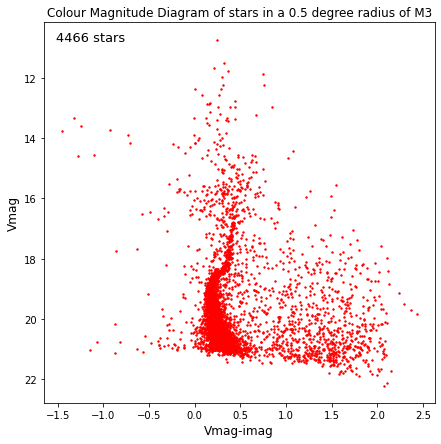

In [42]:
cmd = getCMD(catalogTIC, 
             "Vmag", 
             "fimag", 
             f"Colour Magnitude Diagram of stars in a {search_radius_deg} degree radius of {target_name}")

## About this Notebook
**Author:** Mikhail Martins<br>
**Last Updated on:** 9th June, 2022

[Top of Page](#top_page)<br>
[ADQL Query](#query)